<a href="https://colab.research.google.com/github/Maverick29rus/homework/blob/master/%227_%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B8_Python_%D0%B4%D0%BB%D1%8F_Data_Science%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Навигация по уроку

1. [Библиотеки Python для Data Science](https://colab.research.google.com/drive/1VKRkuVNaSRPy6uNRhWLIlfaTnLPuyWcC)
2. [Отзывы к фильмам (исследуем датасет IMDB)](https://colab.research.google.com/drive/1jL4XbkAMuMNVPXhfsE8Z2Z4h-sGtyAq1)
3. Домашняя работа

Используя базу данных фильмов из практической части урока, проверьте следующие гипотезы:

1. Большинство фильмов выпускаются по пятницам
2. Известные актеры снимаются в самых кассовых фильмах
3. Известные актеры снимаются в самыx дорогих фильмах

Построить графики по гипотезам. Сколько актеров из вашего результата вам знакомы?

# Загрузка и подготовка данных

In [1]:
import os
import pandas as pd
import numpy as np
import ast
from requests import get
# Без этой магической команды графики не отобразятся в ячейке Блокнота
%matplotlib inline
import matplotlib.pyplot as plt # Библиотека для построения графиков
import seaborn as sns # Еще одна библиотека для построения графиков, работает как обертка над предыдущей


In [ ]:
# Отключим предупреждения Python, чтобы не захламлять лишним выводом наш Блокнот
import warnings
warnings.filterwarnings('ignore')


In [ ]:
response = get("https://storage.yandexcloud.net/academy.ai/the_movies_dataset.zip")
with open('the_movies_dataset.zip', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)
# Разархивация датасета в директорию 'the_movies_dataset'
%unzip -qo "the_movies_dataset.zip" -d ./the_movies_dataset

# Папка с распакованным датасетом
FILE_PATH = './the_movies_dataset'


In [ ]:
# Создаем датафрейм из файла метаданных фильмов
df = pd.read_csv(f'{FILE_PATH}/movies_metadata.csv')
# Создаем датафрейм из файла с информацией об актерах и съемочной группе
credits_df = pd.read_csv(f'{FILE_PATH}/credits.csv')
display(df.info(), credits_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

None

None

In [ ]:
# Очистка данных
# Оставляем только нужные нам столбцы
df = df[['revenue', 'budget', 'release_date', 'id']]
# Заменяем нулевые сборы на NaN
df['revenue'] = df['revenue'].replace(0, np.nan)
# Пытаемся преобразовать бюджет в число, в случае ошибки заменяем на NaN
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
# Заменяем нулевой бюджет на NaN
df['budget'] = df['budget'].replace(0, np.nan)
# Преобразовываем строку даты в формат datetime, в случае ошибки заменяем на NaN
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Подговка датасетов к слиянию
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

df['id'] = df['id'].apply(convert_int)  # Преобразуем к int
df = df.drop(df[df['id'].isnull()].index) # Удаляем строки в которых не заполнен ID
df['id'] = df['id'].astype('int') # установим тип

# Объединяем датасеты
df_merge = df.merge(credits_df, on='id')
# Пребразуем строку cast в словарь
df_merge['cast'] = df_merge['cast'].apply(ast.literal_eval)

# Удаляем ненужные столбцы
df_merge = df_merge.drop(['id', 'crew'], axis=1)

display(df_merge.info())
display(df_merge.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45538 entries, 0 to 45537
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   revenue       7428 non-null   float64       
 1   budget        8912 non-null   float64       
 2   release_date  45451 non-null  datetime64[ns]
 3   cast          45538 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.4+ MB


None

,revenue,budget,release_date,cast
0,373554033.0,30000000.0,1995-10-30,"[{'cast_id': 14, 'character': 'Woody (voice)',..."
1,262797249.0,65000000.0,1995-12-15,"[{'cast_id': 1, 'character': 'Alan Parrish', '..."
2,NaN,NaN,1995-12-22,"[{'cast_id': 2, 'character': 'Max Goldman', 'c..."
3,81452156.0,16000000.0,1995-12-22,"[{'cast_id': 1, 'character': 'Savannah 'Vannah..."
4,76578911.0,NaN,1995-02-10,"[{'cast_id': 1, 'character': 'George Banks', '..."


# Гипотеза 1: Большинство фильмов выпускаются по пятницам

<Axes: title={'center': 'Число фильмов по дням недели'}, xlabel='weekday', ylabel='count'>

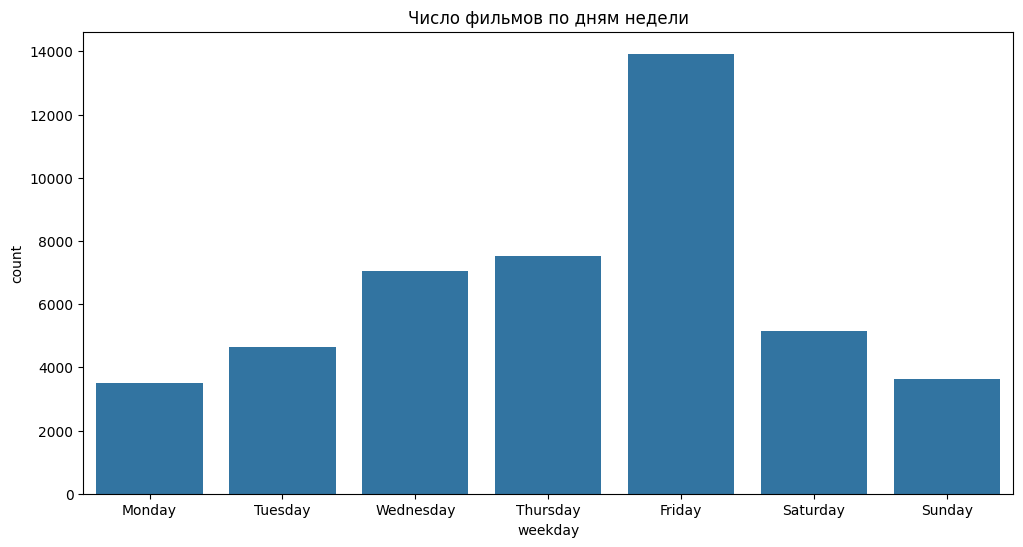

In [ ]:
# Создаем толбец с днем недели выпуска фильма
df_merge['weekday'] = df_merge['release_date'].dt.day_name()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12,6))
plt.title("Число фильмов по дням недели")
sns.countplot(x='weekday', data=df_merge, order=order)


Вывод: Большинство фильмов действительно выпускаются по пятницам

# Гипотеза 2: Известные актеры снимаются в самых кассовых фильмах

In [ ]:
# Создаем столбец с именами актеров
def get_actors(x):
    s = []
    for i in x:
        # Устанаваем пол равный 2 (актер) и берем только основных актеров (чей номер в списке не больше 5)
        if i['gender'] == 2 and i['order'] <= 5:
            s.append(i['name'])
    return s

# Создаем столбец актер, куда записываем актеров по каждому фильму
df_merge['actors'] = df_merge['cast'].apply(get_actors)


Принимаем утверждение, что чем больше снимается актер, тем он известнее. На основе этого утверждения оценим "известность" актеров из самых кассовых фильмов

In [ ]:
# Создаем датафрейм самых кассовых фильмов
most_revenue = df_merge.sort_values('revenue', ascending=False).head(50)
# Создаем список из имен актеров снявшихся в самых кассовых фильмах
actors_rev = list(set(most_revenue['actors'].sum()))
# Создаем массив с именами актеров и общим количеством фильмов в которых они снимались
df_actor_rev = pd.Series(data=0, index=actors_rev, name='movie count')
for i in df_merge['actors']:
    for x in i:
        try:
            df_actor_rev[x] += 1
        except KeyError:
            continue

df_actor_rev = df_actor_rev.sort_values(ascending=False)
display(df_actor_rev.head(10))


,movie count
Christopher Lee,109
Michael Caine,98
Christopher Walken,77
Willem Dafoe,71
Liam Neeson,68
James Franco,66
Stellan Skarsgård,65
Antonio Banderas,64
Ben Kingsley,62
Tom Hanks,61


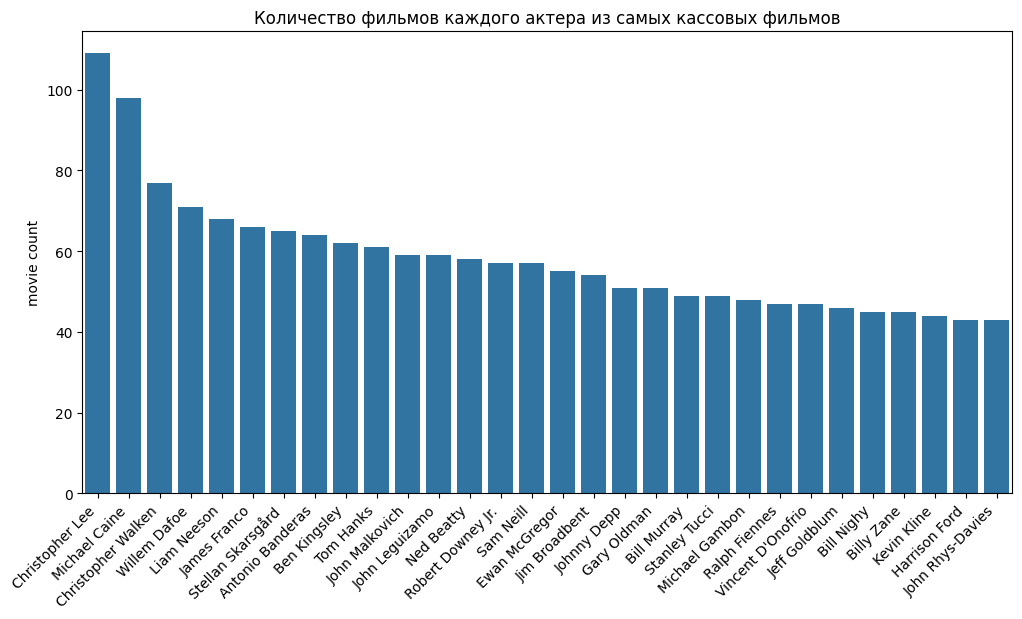

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Количество фильмов каждого актера из самых кассовых фильмов')
sns.barplot(data=df_actor_rev.head(30))
plt.xticks(rotation=45, ha='right')
plt.show()


Вывод: В кассовых фильмах действительно снимается много известных актеров

# Гипотеза 3: Известные актеры снимаются в самыx дорогих фильмах

In [ ]:
# Создаем датафрейм самых дорогих фильмов
most_budget = df_merge.sort_values('budget', ascending=False).head(50)
# Создаем список из имен актеров снявшихся в самых кассовых фильмах
actors_bud = list(set(most_budget['actors'].sum()))
# Создаем массив с именами актеров и общим количеством фильмов в которых они снимались
df_actor_budget = pd.Series(data=0, index=actors_bud, name='movie count')
for i in df_merge['actors']:
    for x in i:
        try:
            df_actor_budget[x] += 1
        except KeyError:
            continue

df_actor_budget = df_actor_budget.sort_values(ascending=False)
display(df_actor_budget.head(10))


,movie count
Christopher Lee,109
Michael Caine,98
John Goodman,74
Steve Buscemi,72
Willem Dafoe,71
Liam Neeson,68
Max von Sydow,67
James Franco,66
Stellan Skarsgård,65
William Hurt,65


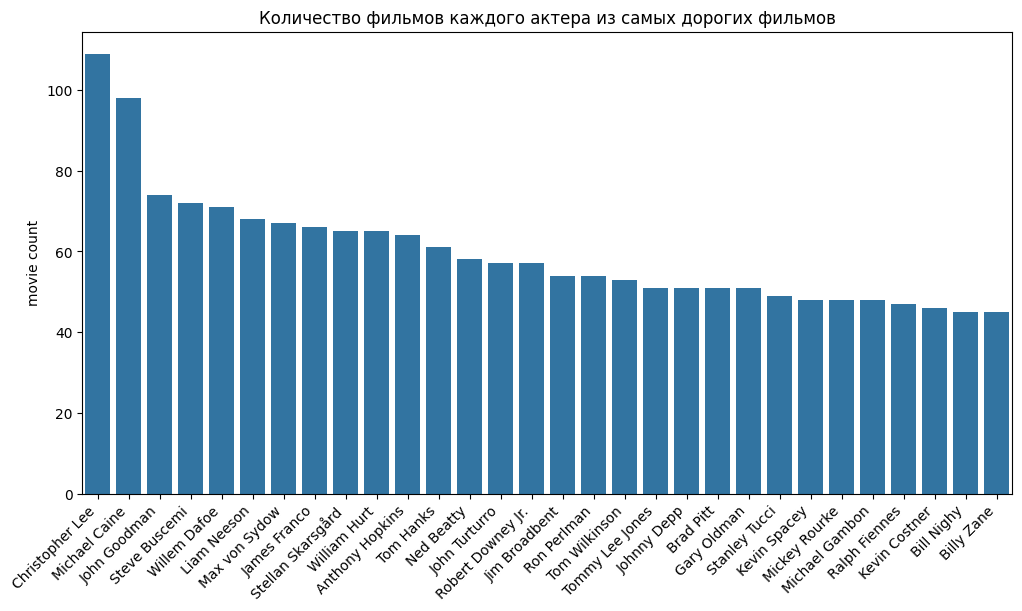

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Количество фильмов каждого актера из самых дорогих фильмов')
sns.barplot(data=df_actor_budget.head(30))
plt.xticks(rotation=45, ha='right')
plt.show()


Вывод: В дорогих фильмах действительно снимается много известных актеров